## Official seaborn tutorial

[link](https://seaborn.pydata.org/tutorial.html)

### Visualizing statistical relationships

[link](https://seaborn.pydata.org/tutorial/relational.html)

We will discuss three seaborn functions in this tutorial. The one we will use most is relplot(). This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions:

- scatterplot() (with kind="scatter"; the default)
- lineplot() (with kind="line")

As we will see, these functions can be quite illuminating because they use simple and easily-understood representations of data that can nevertheless represent complex dataset structures. They can do so because they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")


There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the scatterplot() function. In the categorical visualization tutorial, we will see specialized tools for using scatterplots to visualize categorical data. The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):

In [6]:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
sns.__version__

'0.9.0'

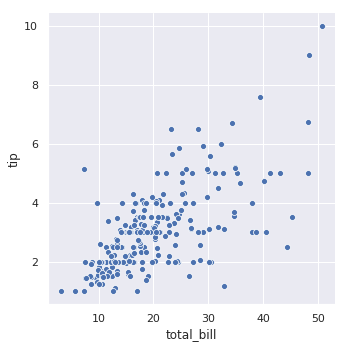

In [12]:
sns.relplot(x="total_bill", y="tip", data=tips, kind='scatter')


While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:



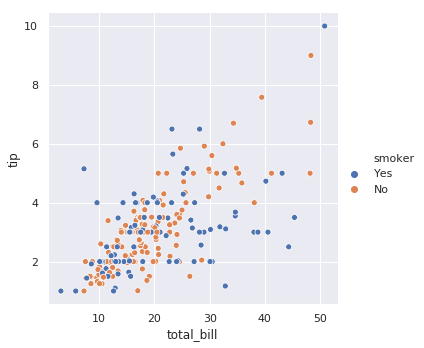

In [13]:
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips)

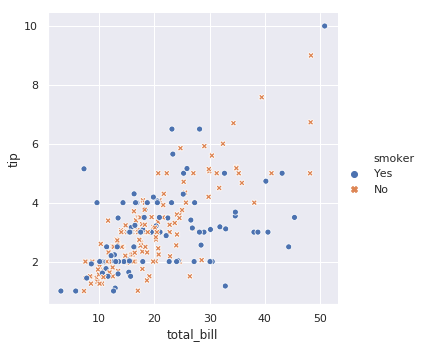

In [14]:
sns.relplot(x='total_bill', y='tip', hue='smoker', style='smoker', data=tips)

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:



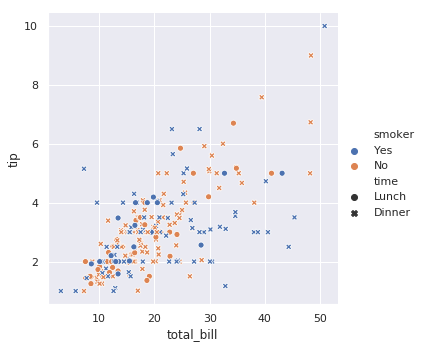

In [15]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:



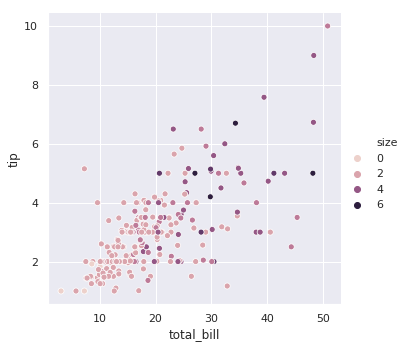

In [16]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);


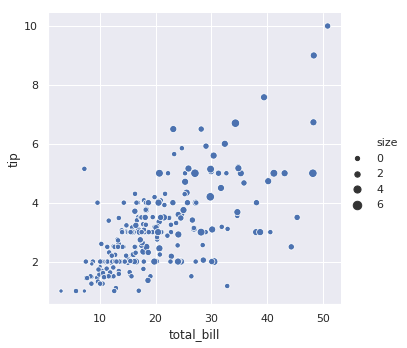

In [17]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);


Unlike with matplotlib.pyplot.scatter(), the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is normalized into a range in area units. This range can be customized:

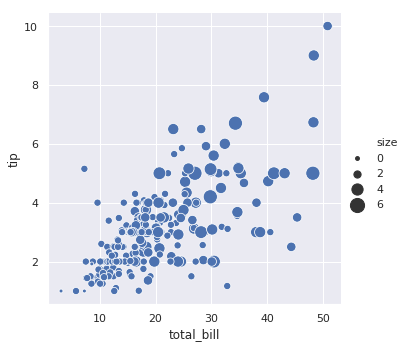

In [18]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);


### Emphasizing continuity with line plots

Scatter plots are highly effective, but there is no universally optimal type of visualiation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

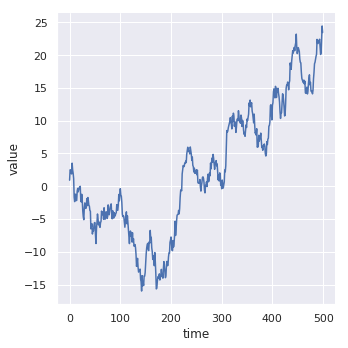

In [19]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)

g

Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled:



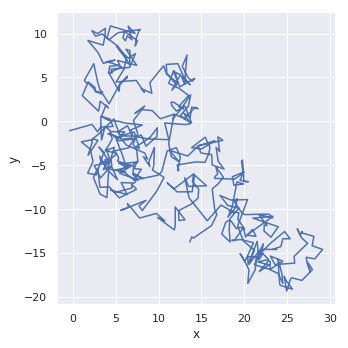

In [20]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x='x', y='y', data=df, sort = False, kind='line')

### Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

In [24]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


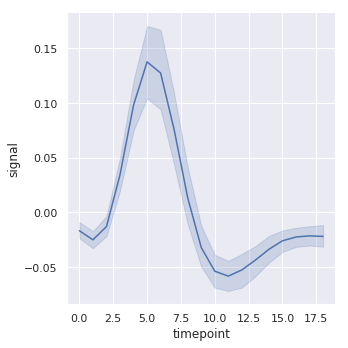

In [25]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

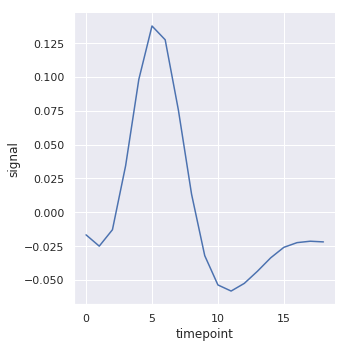

In [26]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);


Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:



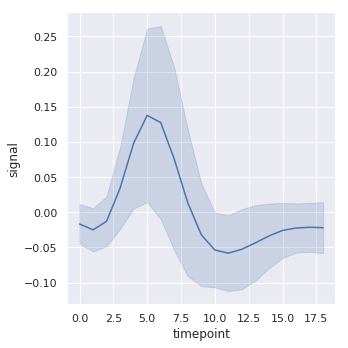

In [27]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);


To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.



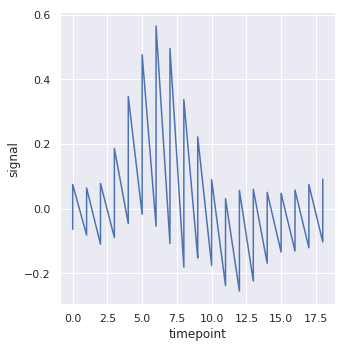

In [29]:
sns.relplot(x="timepoint", y="signal", data=fmri, kind="line", estimator = None)

The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements. It does so using the same API as scatterplot(), meaning that we don’t need to stop and think about the parameters that control the look of lines vs. points in matplotlib.

Using semantics in lineplot() will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

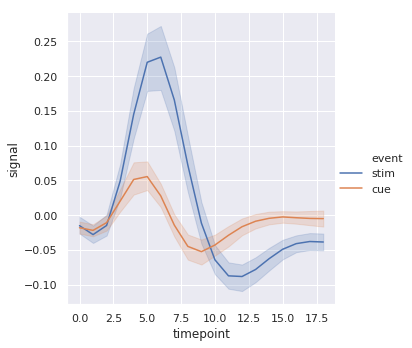

In [30]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);


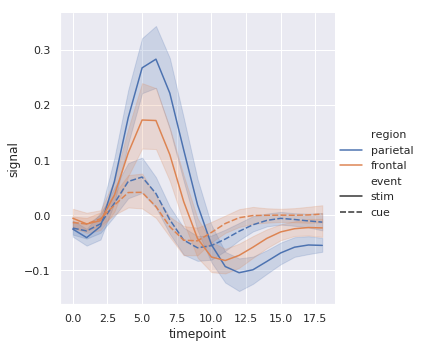

In [31]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

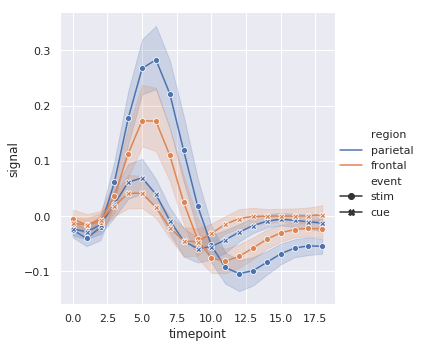

In [32]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", dashes=False, markers=True, kind="line", data=fmri)

When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend:



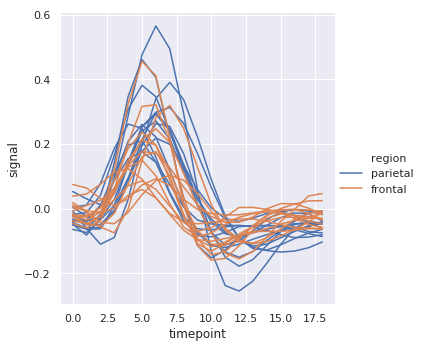

In [37]:
sns.relplot(x="timepoint", y="signal", hue="region", estimator = None, units = "subject",
            kind="line", data=fmri.query("event == 'stim'"))

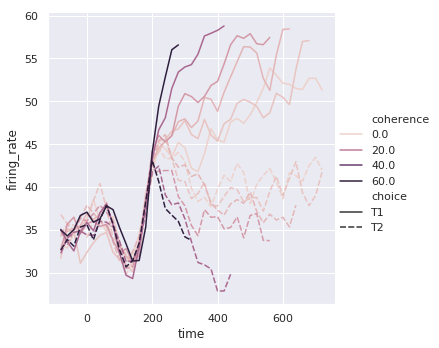

In [38]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

### Plotting with date data

Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:



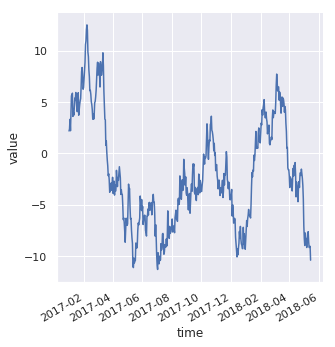

In [41]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))

g = sns.relplot(x="time", y="value", kind="line", data=df)

g.fig.autofmt_xdate()

### Showing multiple relationships with facets

We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


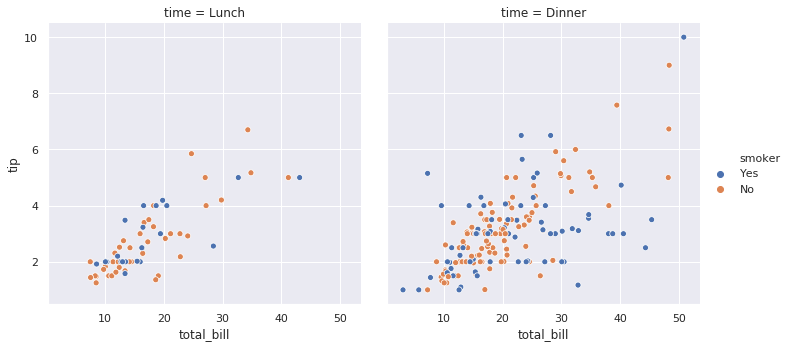

In [43]:
sns.relplot(col="time", x="total_bill", y="tip", hue="smoker", data=tips)

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

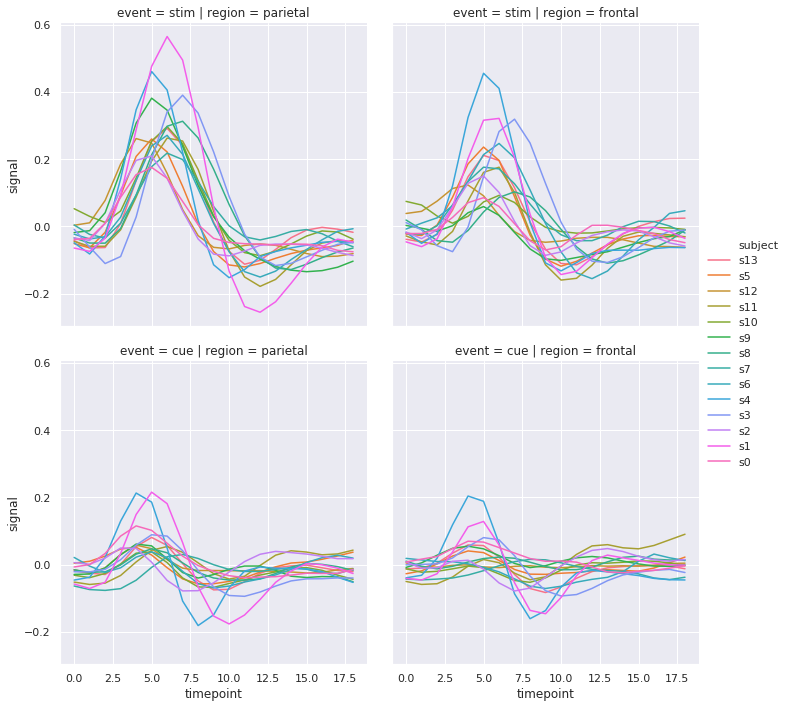

In [46]:
sns.relplot(x="timepoint", y="signal", data=fmri, hue="subject",
           estimator=None, row="event", col="region", kind="line", height=5)

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:



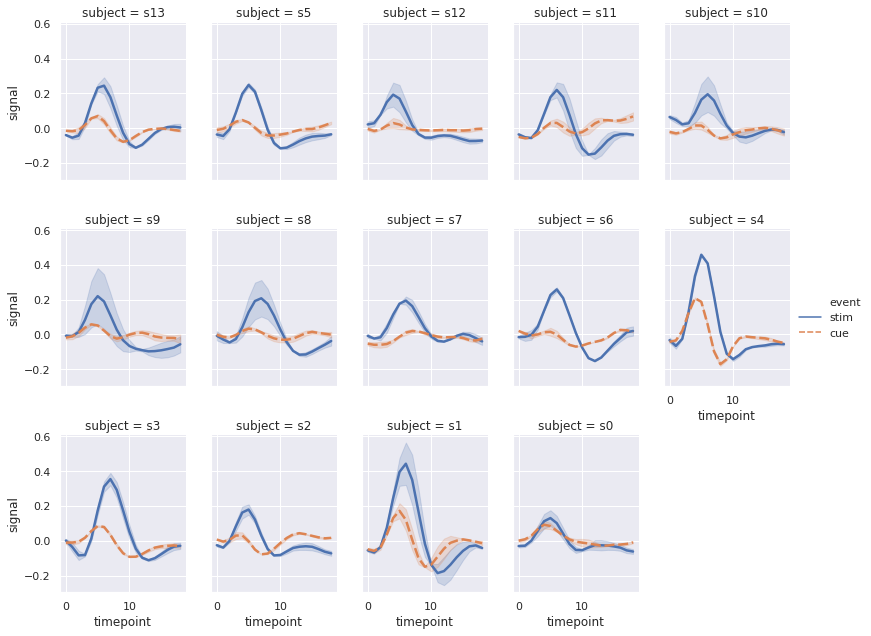

In [48]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri);